In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from scipy.stats import sem, linregress
pd.options.display.float_format = '{0:,.2f}'.format

# The path to our CSV file
water_file = "../1_Input/Resources/Water_data.csv"
pop_file = "../1_Input/Resources/Population.csv"

# Read water data into pandas
water_df = pd.read_csv(water_file)
water_df.head()

,State_code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,CA,"34,938,616.00","34,982,115.00","35,989,579.00","36,427,824.00","42,109,090.00","42,183,613.00","42,277,601.00","39,678,342.00","39,957,597.00","40,192,641.00","41,009,912.00","41,032,941.00","41,029,373.00",41012626,41174594,41174437,"41,173,094.00","40,448,289.00"
1,CO,"6,009,119.00","6,009,119.00","6,009,037.00","6,009,119.00","6,009,119.00","6,009,119.00","6,009,074.00","6,009,037.00","6,009,074.00","6,009,074.00","6,009,074.00","6,009,118.00","6,009,118.00",5220316,5261460,5263167,"5,263,167.00","5,662,264.00"
2,CT,nan,"2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00",2673185,2685610,2754692,"2,751,816.00","2,762,104.00"
3,FL,"19,228,025.00","19,228,025.00","19,228,025.00","19,228,025.00","19,228,025.00","19,227,975.00","19,228,025.00","19,228,025.00","19,227,961.00","19,227,891.00","19,227,961.00","19,227,911.00","19,238,280.00",19231059,19231189,19353826,"19,353,871.00","19,895,595.00"
4,IA,"2,370,181.00","2,352,599.00","2,349,976.00","2,458,129.00","2,494,821.00","2,733,140.00","2,744,749.00","2,751,614.00","2,729,866.00","2,680,509.00","2,745,961.00","2,698,490.00","2,679,229.00",2721205,2751937,2753592,"2,761,831.00","2,804,827.00"


In [3]:
# Read population data into pandas
population_df = pd.read_csv(pop_file)
population_df.head()

,State_code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,AL,4369862,4452173,4467634,4480089,4503491,4530729,4569805,4628981,4672840,4718206,4757938,4785579,4798649,4813946,4827660,4840037,4850858,4860545
1,AK,619500,627963,633714,642337,648414,659286,666946,675302,680300,687455,698895,714015,722259,730825,736760,736759,737979,741522
2,AZ,4778332,5160586,5273477,5396255,5510364,5652404,5839077,6029141,6167681,6280362,6343154,6407002,6465488,6544211,6616124,6706435,6802262,6908642
3,AR,2551373,2678588,2691571,2705927,2724816,2749686,2781097,2821761,2848650,2874554,2896843,2921737,2938640,2949208,2956780,2964800,2975626,2988231
4,CA,33145121,33987977,34479458,34871843,35253159,35574576,35827943,36021202,36250311,36604337,36961229,37327690,37672654,38019006,38347383,38701278,39032444,39296476


In [4]:
#Merge water and population data
merge_df = pd.merge(water_df,population_df , on="State_code",suffixes=("_water","_population"), copy=True)
merge_df.head()

,State_code,1999_water,2000_water,2001_water,2002_water,2003_water,2004_water,2005_water,2006_water,2007_water,...,2007_population,2008_population,2009_population,2010_population,2011_population,2012_population,2013_population,2014_population,2015_population,2016_population
0,CA,"34,938,616.00","34,982,115.00","35,989,579.00","36,427,824.00","42,109,090.00","42,183,613.00","42,277,601.00","39,678,342.00","39,957,597.00",...,36250311,36604337,36961229,37327690,37672654,38019006,38347383,38701278,39032444,39296476
1,CO,"6,009,119.00","6,009,119.00","6,009,037.00","6,009,119.00","6,009,119.00","6,009,119.00","6,009,074.00","6,009,037.00","6,009,074.00",...,4803868,4889730,4972195,5048029,5116411,5186330,5262556,5342311,5440445,5530105
2,CT,nan,"2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00","2,664,364.00",...,3527270,3545579,3561807,3580171,3591927,3597705,3602470,3600188,3593862,3587685
3,FL,"19,228,025.00","19,228,025.00","19,228,025.00","19,228,025.00","19,228,025.00","19,227,975.00","19,228,025.00","19,228,025.00","19,227,961.00",...,18367842,18527305,18652644,18846461,19097369,19341327,19584927,19897747,20268567,20656589
4,IA,"2,370,181.00","2,352,599.00","2,349,976.00","2,458,129.00","2,494,821.00","2,733,140.00","2,744,749.00","2,751,614.00","2,729,866.00",...,2999212,3016734,3032870,3050223,3063690,3074386,3089876,3105563,3118473,3130869


In [5]:
# drop null rows
no_null_water_df = merge_df.dropna(how='any')
no_null_water_states = list(no_null_water_df['State_code'])
no_null_water_df.head()

,State_code,1999_water,2000_water,2001_water,2002_water,2003_water,2004_water,2005_water,2006_water,2007_water,...,2007_population,2008_population,2009_population,2010_population,2011_population,2012_population,2013_population,2014_population,2015_population,2016_population
0,CA,"34,938,616.00","34,982,115.00","35,989,579.00","36,427,824.00","42,109,090.00","42,183,613.00","42,277,601.00","39,678,342.00","39,957,597.00",...,36250311,36604337,36961229,37327690,37672654,38019006,38347383,38701278,39032444,39296476
1,CO,"6,009,119.00","6,009,119.00","6,009,037.00","6,009,119.00","6,009,119.00","6,009,119.00","6,009,074.00","6,009,037.00","6,009,074.00",...,4803868,4889730,4972195,5048029,5116411,5186330,5262556,5342311,5440445,5530105
3,FL,"19,228,025.00","19,228,025.00","19,228,025.00","19,228,025.00","19,228,025.00","19,227,975.00","19,228,025.00","19,228,025.00","19,227,961.00",...,18367842,18527305,18652644,18846461,19097369,19341327,19584927,19897747,20268567,20656589
4,IA,"2,370,181.00","2,352,599.00","2,349,976.00","2,458,129.00","2,494,821.00","2,733,140.00","2,744,749.00","2,751,614.00","2,729,866.00",...,2999212,3016734,3032870,3050223,3063690,3074386,3089876,3105563,3118473,3130869
5,KS,"2,693,760.00","2,693,760.00","2,694,110.00","2,694,110.00","2,714,014.00","2,712,274.00","2,712,199.00","2,711,681.00","2,703,485.00",...,2783785,2808076,2832704,2858403,2868756,2885316,2892900,2899553,2905789,2907731


Text(0.5,1,'Water Access per Capita by State')

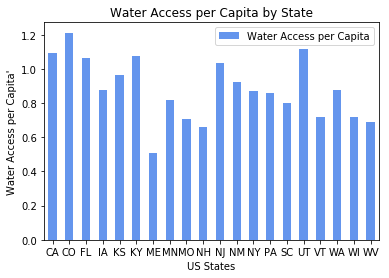

In [6]:
# We would like to normalize the # of people with water access per state 
# (ie. the *_water columns) by the states' population data
# Caveat: the sources of information differ, and so we cannot really 
# expect values in the 0-1 range, but hopefully they won't deviate too much...

years = range(1999,2017)
water_norm = pd.DataFrame()

# populate a new dataframe with the normalized values (corresponding water columns divided by population columns)
for i in range(len(years)):
    water_norm_i = no_null_water_df[str(years[i]) + "_water"] / no_null_water_df[str(years[i]) + "_population"].replace(',','')
    water_norm[str(years[i])] = water_norm_i.values
water_norm['State_code'] = no_null_water_states

# build a multi_index tuples:
my_tuples = []
for state in water_norm['State_code']:
    for year in years:
        my_tuples.append((state, year))

water_norm = pd.melt(water_norm, id_vars=['State_code'], value_vars=list(water_norm.columns)[:-1], 
                     var_name='Years', value_name='Water Access per Capita')
water_norm = water_norm.rename(columns={'State_code': 'State',
                                        'Years': 'Year'})
water_norm_per_year_and_state = water_norm.groupby(['State','Year']).sum()
water_norm_per_year_and_state.head()
water_norm_per_year_and_state2 = water_norm.groupby(['State']).mean()
water_norm_per_year_and_state2.head()
first_graph = water_norm_per_year_and_state2.plot.bar(rot=0, color = ['cornflowerblue'], legend=True,)
# Incorporate the other graph properties
plt.xlabel("US States")
plt.ylabel("Water Access per Capita'")
plt.title("Water Access per Capita by State")


In [7]:
national_agency_base = "https://api.usa.gov/crime/fbi/sapi/api/participation/national?api_key={myapi_key}"
violent_state_base = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/violent-crime/offense/states/"
api_key_url = "/count?api_key="
myapi_key = "FaiahkB1PpyTF7e8qEp6JZ3TnOmokQ2sW2OTU099"
some_states = ['AL', 'AZ', 'AR', 'CO', 'CT', 'DE', 'DC', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NH', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI']
state_list_some = []
year_list_2 = []
offense_name_list_2 = []
offense_count_list_2 = []

for state in some_states:
    violent_state_url = violent_state_base + state + api_key_url + myapi_key 
    response_2 = requests.get(violent_state_url).json()

    if int(response_2['pagination']['count'])!=0:
        for i in range(len(response_2['results'])):
            #print()
            if response_2['results'][i]['data_year'] in range(1999,2017): 
                state_list_some.append(state)
                year_list_2.append(response_2['results'][i]['data_year'])
                offense_name_list_2.append(response_2['results'][i]['offense_name'])
                offense_count_list_2.append(response_2['results'][i]['offense_count'])
        #print(state_list_some)
        #pprint(response_2)

In [8]:
FBI_data_some = pd.DataFrame({'State': state_list_some,
                         'Year': year_list_2,
                         'Offense': offense_name_list_2,
                         'Offense Count': offense_count_list_2
                        })
FBI_data_some.head()

,State,Year,Offense,Offense Count
0,AL,2006,aggravated-assault,31
1,AL,2007,aggravated-assault,33
2,AL,2008,aggravated-assault,34
3,AL,2009,aggravated-assault,33
4,AL,2010,aggravated-assault,24


In [9]:
FBI_data_some = FBI_data_some.groupby(["State", "Year"]).sum()
FBI_data_some.head()

Offense Count
State Year               
AL    2006            170
      2007            187
      2008            145
      2009            121
      2010            105

In [10]:
water_dummy = water_norm_per_year_and_state.reset_index()
water_dummy['State_Year'] = [water_dummy['State'][i] + "_" + str(water_dummy['Year'][i]) for i in range(water_dummy.shape[0])]
FBI_dummy = FBI_data_some.reset_index()
FBI_dummy['State_Year'] = [FBI_dummy['State'][i] + "_" + str(FBI_dummy['Year'][i]) for i in range(FBI_dummy.shape[0])]

offense_and_water_access = pd.merge(water_dummy, FBI_dummy, on='State_Year', how='inner')
States_list = [offense_and_water_access['State_Year'][i][0:2] for i in range(offense_and_water_access.shape[0])]
Years_list = [int(offense_and_water_access['State_Year'][i][3:]) for i in range(offense_and_water_access.shape[0])]
offense_and_water_access = pd.DataFrame({'State': States_list,
                                         'Year': Years_list,
                                         'Water Access per Capita': list(offense_and_water_access['Water Access per Capita']),
                                         'Offense Count': list(offense_and_water_access['Offense Count'])})
offense_and_water_access = offense_and_water_access[['State', 'Year', 'Water Access per Capita', 'Offense Count']]
offense_and_water_access = offense_and_water_access.groupby(['State','Year']).sum()
offense_and_water_access.head()

Water Access per Capita  Offense Count
State Year                                        
CO    1999                     1.48           6683
      2000                     1.39           7111
      2001                     1.36           7368
      2002                     1.34           8167
      2003                     1.33           8438

In [11]:
# Save to csv:
offense_and_water_access.to_csv('../1_Input/Water_access_and_offense_count.csv', encoding='utf-8')

slope:  5873.592982833696
R-squared: 0.01808226781085902


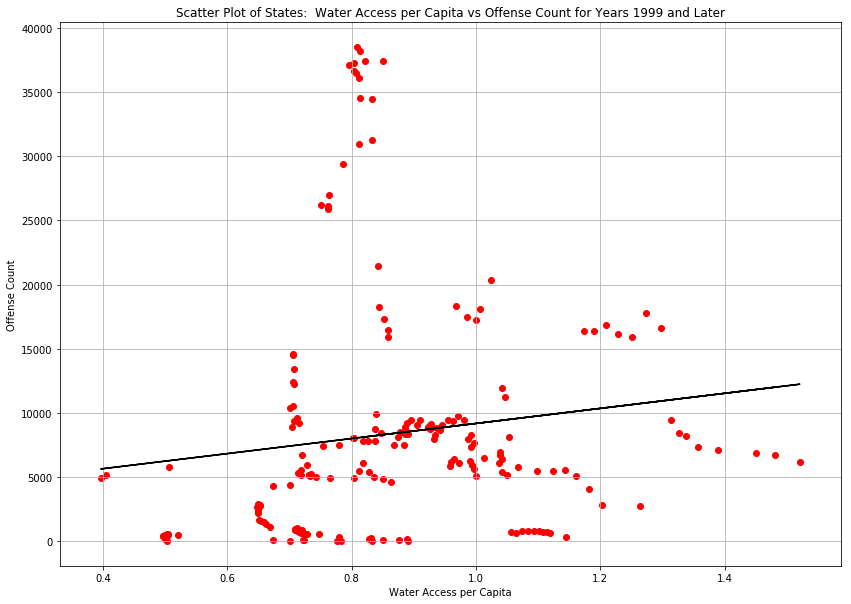

In [12]:
plt.scatter(offense_and_water_access["Water Access per Capita"], offense_and_water_access["Offense Count"], color='r')
plt.title('Scatter Plot of States:  Water Access per Capita vs Offense Count for Years 1999 and Later')
plt.xlabel("Water Access per Capita")
plt.ylabel("Offense Count")

z = np.polyfit(offense_and_water_access["Water Access per Capita"], offense_and_water_access["Offense Count"], 1)
p = np.poly1d(z)
plt.plot(offense_and_water_access["Water Access per Capita"], p(offense_and_water_access["Water Access per Capita"]),"k")

plt.grid()

plt.gcf().set_size_inches(14, 10)

x = offense_and_water_access['Water Access per Capita']
y = offense_and_water_access['Offense Count']
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: ", slope)
print("R-squared:", r_value*r_value)

# Save the Figure
plt.savefig("../6_Output/US Water Access per Capita vs Offense Count.png")

# Show the Figure
plt.show()

In [13]:
# Read the processed DataFrame:

offense_and_water_access = pd.read_csv('../1_Input/Water_access_and_offense_count.csv', encoding='utf-8')
offense_and_water_access = offense_and_water_access.groupby(['State','Year']).sum()
offense_and_water_access.head()

Water Access per Capita  Offense Count
State Year                                        
CO    1999                     1.48           6683
      2000                     1.39           7111
      2001                     1.36           7368
      2002                     1.34           8167
      2003                     1.33           8438

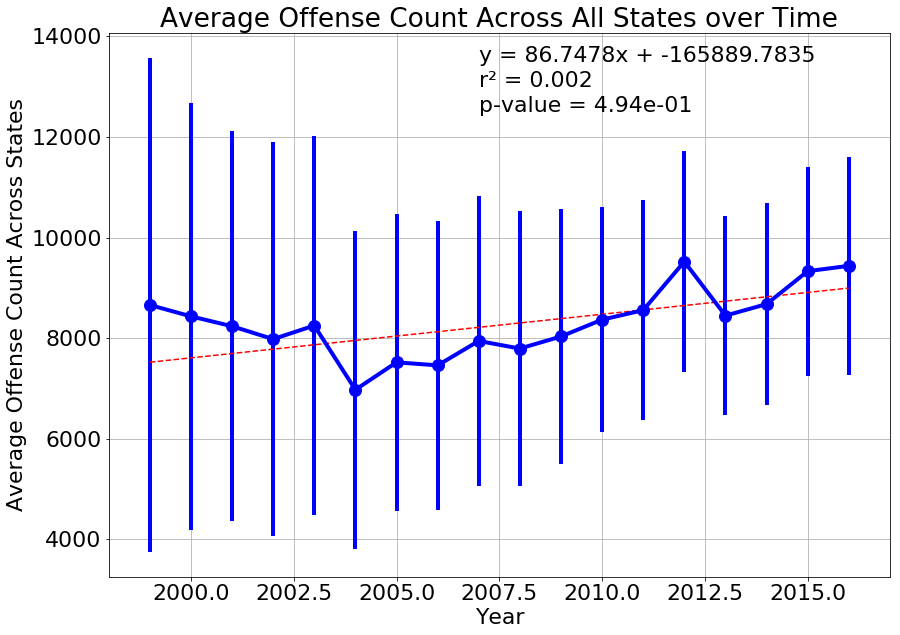

In [16]:
offense_and_water_access_year_mean = offense_and_water_access.groupby('Year').mean()
offense_and_water_access_year_sem = offense_and_water_access.groupby('Year').sem()

year_labels = [str(offense_and_water_access_year_mean.reset_index()['Year'][i]) for i in np.arange(offense_and_water_access_year_mean.shape[0])]
plt.errorbar(offense_and_water_access_year_mean.index, offense_and_water_access_year_mean['Offense Count'],
             yerr=offense_and_water_access_year_sem['Offense Count'], label=year_labels,
             marker='o', linewidth=4, markersize=12, 
             linestyle='solid', color='blue', alpha=1)

# Adding a trendline
x=offense_and_water_access.reset_index()['Year']
y=offense_and_water_access.reset_index()['Offense Count']
slope, _, r_value, p_value, _ = linregress(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
plt.text(2007, 13500, f"y = {z[0]:.4f}x + {z[1]:.4f}")
plt.text(2007, 13000, f"r\N{SUPERSCRIPT TWO} = {r_value**2:.3f}")
plt.text(2007, 12500, f"p-value = {p_value:.2e}")

plt.title('Average Offense Count Across All States over Time')
plt.xlabel('Year')
plt.axis(xmin=1998, xmax=2017)
plt.ylabel('Average Offense Count Across States')
plt.grid()
plt.gcf().set_size_inches(14, 10)
plt.rcParams.update({'font.size': 22})
plt.savefig("../6_Output/Average_USA_offense_count_per_year_NP.png", bbox_inches='tight')
plt.show()

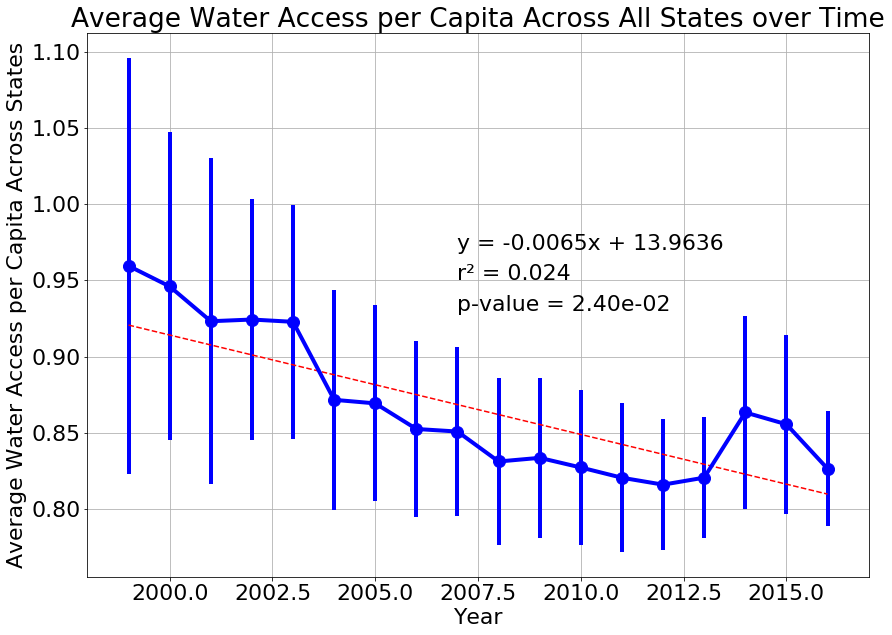

In [17]:
year_labels = [str(offense_and_water_access_year_mean.reset_index()['Year'][i]) for i in np.arange(offense_and_water_access_year_mean.shape[0])]
plt.errorbar(offense_and_water_access_year_mean.index, offense_and_water_access_year_mean['Water Access per Capita'],
             yerr=offense_and_water_access_year_sem['Water Access per Capita'], label=year_labels,
             marker='o', linewidth=4, markersize=12, 
             linestyle='solid', color='blue', alpha=1)

# Adding a trendline
x=offense_and_water_access.reset_index()['Year']
y=offense_and_water_access.reset_index()['Water Access per Capita']
slope, _, r_value, p_value, _ = linregress(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
plt.text(2007, 0.97, f"y = {z[0]:.4f}x + {z[1]:.4f}")
plt.text(2007, 0.95, f"r\N{SUPERSCRIPT TWO} = {r_value**2:.3f}")
plt.text(2007, 0.93, f"p-value = {p_value:.2e}")

plt.title('Average Water Access per Capita Across All States over Time')
plt.xlabel('Year')
plt.axis(xmin=1998, xmax=2017)
plt.ylabel('Average Water Access per Capita Across States')
plt.grid()
plt.gcf().set_size_inches(14, 10)
plt.rcParams.update({'font.size': 22})
plt.savefig("../6_Output/Average_USA_water_access_per_year_NP.png", bbox_inches='tight')
plt.show()